In [1]:
# load packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

## Load Data

In [2]:
data = pd.read_csv("/Users/nityansuman/__data__/housing_dataset/house-pricing-dataset.csv")
data.shape, data.columns

((21613, 21),
 Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'lat', 'long', 'sqft_living15', 'sqft_lot15'],
       dtype='object'))

In [3]:
# display all columns
pd.set_option('display.max_columns', 100) # max 100 columns

In [4]:
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# get dates
data["sale_year"] = pd.to_numeric(data.date.apply(lambda x: str(x)[:4]))
data["sale_month"] = pd.to_numeric(data.date.apply(lambda x: str(x)[4:6]))
data["sale_day"] = pd.to_numeric(data.date.apply(lambda x: str(x)[6:8]))

data = pd.DataFrame(data, columns=[
    "sale_year", "sale_month", "sale_day",
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "condition", "grade", "sqft_above", "sqft_basement", "yr_built",
    "zipcode", "lat", "long", "sqft_living15", "sqft_lot15", "price"
])

label_col = "price"

In [7]:
data.head(5)

,sale_year,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014,10,13,3,1.00,1180,5650,1.0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,221900.0
1,2014,12,9,3,2.25,2570,7242,2.0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,538000.0
2,2015,2,25,2,1.00,770,10000,1.0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,180000.0
3,2014,12,9,4,3.00,1960,5000,1.0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,604000.0
4,2015,2,18,3,2.00,1680,8080,1.0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,510000.0


In [8]:
x_train, x_test, y_train, y_test = train_test_split(data[[col for col in data.columns if col != "price"]], data[["price"]], test_size=0.3)

In [9]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [10]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((15129, 18), (15129, 1), (6484, 18), (6484, 1))

## Neural Regression Model

In [11]:
# initiate sequential model
baseline_model = tf.keras.Sequential()
baseline_model.add(tf.keras.layers.Dense(units=64, activation="tanh", input_shape=(x_train.shape[1], ))) # input layer

baseline_model.add(tf.keras.layers.Dense(units=128, activation="relu", bias_regularizer="l1_l2", kernel_regularizer="l1_l2")) # first hidden layer
baseline_model.add(tf.keras.layers.Dropout(rate=0.2)) # drop 20% of nodes

baseline_model.add(tf.keras.layers.Dense(units=32, activation="relu", bias_regularizer="l1_l2", kernel_regularizer="l1_l2")) # second hidden layer
baseline_model.add(tf.keras.layers.Dropout(rate=0.2)) # drop 20% of nodes

baseline_model.add(tf.keras.layers.Dense(units=16, activation="relu", bias_regularizer="l1_l2", kernel_regularizer="l1_l2")) # second hidden layer
baseline_model.add(tf.keras.layers.Dropout(rate=0.2)) # drop 20% of nodes

baseline_model.add(tf.keras.layers.Dense(units=32, activation="relu", bias_regularizer="l1_l2", kernel_regularizer="l1_l2")) # second hidden layer
baseline_model.add(tf.keras.layers.Dropout(rate=0.2)) # drop 20% of nodes

baseline_model.add(tf.keras.layers.Dense(units=8, activation="relu", bias_regularizer="l1_l2", kernel_regularizer="l1_l2")) # second hidden layer

baseline_model.add(tf.keras.layers.Dense(units=1))

baseline_model.compile(
    optimizer="rmsprop",
    loss="mean_squared_error",
    metrics=["mean_absolute_error"]
)

history = baseline_model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=1000,
    shuffle=True,
    verbose=True,
    validation_data=(x_test, y_test),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="mean_absolute_error", patience=50, verbose=1, mode="auto")]
)

Train on 15129 samples, validate on 6484 samples
Epoch 1/1000
15129/15129 [==============================] - 1s 68us/step - loss: 424306945618.3383 - mean_absolute_error: 536142.0640 - val_loss: 409023752787.0697 - val_mean_absolute_error: 528079.5497
Epoch 2/1000
15129/15129 [==============================] - 0s 21us/step - loss: 321639074469.7934 - mean_absolute_error: 423271.9490 - val_loss: 174887358903.6693 - val_mean_absolute_error: 251741.9510
Epoch 3/1000
15129/15129 [==============================] - 0s 21us/step - loss: 158702797697.2268 - mean_absolute_error: 249327.4868 - val_loss: 137978701330.0037 - val_mean_absolute_error: 236520.3992
Epoch 4/1000
15129/15129 [==============================] - 0s 21us/step - loss: 154106919331.7798 - mean_absolute_error: 248506.0763 - val_loss: 137441681546.9760 - val_mean_absolute_error: 233859.2017
Epoch 5/1000
15129/15129 [==============================] - 0s 21us/step - loss: 152971827819.5846 - mean_absolute_error: 246975.5963 - val

Epoch 41/1000
15129/15129 [==============================] - 0s 21us/step - loss: 145038148231.6060 - mean_absolute_error: 240165.1789 - val_loss: 128542114858.3245 - val_mean_absolute_error: 235172.9764
Epoch 42/1000
15129/15129 [==============================] - 0s 21us/step - loss: 145002228766.1196 - mean_absolute_error: 241320.3997 - val_loss: 128216553723.4201 - val_mean_absolute_error: 232603.9026
Epoch 43/1000
15129/15129 [==============================] - 0s 21us/step - loss: 144625262551.9307 - mean_absolute_error: 240838.4857 - val_loss: 129018208475.8347 - val_mean_absolute_error: 226262.7956
Epoch 44/1000
15129/15129 [==============================] - 0s 20us/step - loss: 144119975370.9691 - mean_absolute_error: 240699.5389 - val_loss: 129304719895.6891 - val_mean_absolute_error: 225553.5429
Epoch 45/1000
15129/15129 [==============================] - 0s 21us/step - loss: 142906514867.6856 - mean_absolute_error: 239122.8445 - val_loss: 128354468623.3189 - val_mean_absolute

15129/15129 [==============================] - 0s 21us/step - loss: 142625953080.0936 - mean_absolute_error: 237345.8262 - val_loss: 133117450852.7576 - val_mean_absolute_error: 222516.3281
Epoch 82/1000
15129/15129 [==============================] - 0s 21us/step - loss: 142204784575.8350 - mean_absolute_error: 238123.9728 - val_loss: 137352439761.2535 - val_mean_absolute_error: 221643.6519
Epoch 83/1000
15129/15129 [==============================] - 0s 20us/step - loss: 143450116559.2332 - mean_absolute_error: 237490.0617 - val_loss: 131281914905.9001 - val_mean_absolute_error: 224081.9523
Epoch 84/1000
15129/15129 [==============================] - 0s 21us/step - loss: 144112832397.4777 - mean_absolute_error: 238421.3090 - val_loss: 130326862884.0074 - val_mean_absolute_error: 225468.7602
Epoch 85/1000
15129/15129 [==============================] - 0s 21us/step - loss: 142241775586.7603 - mean_absolute_error: 237787.7187 - val_loss: 135637950006.6428 - val_mean_absolute_error: 221641

15129/15129 [==============================] - 0s 21us/step - loss: 140838697066.8063 - mean_absolute_error: 235593.3753 - val_loss: 136813653316.0666 - val_mean_absolute_error: 221489.8319
Epoch 122/1000
15129/15129 [==============================] - 0s 21us/step - loss: 140825653810.3235 - mean_absolute_error: 236420.7095 - val_loss: 135968060597.3004 - val_mean_absolute_error: 221477.9620
Epoch 123/1000
15129/15129 [==============================] - 0s 21us/step - loss: 140995696429.5009 - mean_absolute_error: 236315.4744 - val_loss: 130927830235.2029 - val_mean_absolute_error: 224108.0304
Epoch 124/1000
15129/15129 [==============================] - 0s 21us/step - loss: 141717028763.2853 - mean_absolute_error: 237002.9730 - val_loss: 135710445701.9223 - val_mean_absolute_error: 221489.3773
Epoch 125/1000
15129/15129 [==============================] - 0s 20us/step - loss: 141290872868.2789 - mean_absolute_error: 236291.2458 - val_loss: 133575178253.8976 - val_mean_absolute_error: 22

15129/15129 [==============================] - 0s 21us/step - loss: 140716917948.9077 - mean_absolute_error: 236622.7016 - val_loss: 132926973506.0136 - val_mean_absolute_error: 222139.6610
Epoch 162/1000
15129/15129 [==============================] - 0s 21us/step - loss: 140661066723.0987 - mean_absolute_error: 236629.2709 - val_loss: 133401125637.2116 - val_mean_absolute_error: 221897.7536
Epoch 163/1000
15129/15129 [==============================] - 0s 21us/step - loss: 139959605913.6101 - mean_absolute_error: 236108.5102 - val_loss: 135843929460.0765 - val_mean_absolute_error: 221363.2819
Epoch 164/1000
15129/15129 [==============================] - 0s 21us/step - loss: 139823620901.7172 - mean_absolute_error: 235381.7534 - val_loss: 137924047803.1437 - val_mean_absolute_error: 221527.8817
Epoch 165/1000
15129/15129 [==============================] - 0s 21us/step - loss: 139668129193.5330 - mean_absolute_error: 235922.5618 - val_loss: 134389058697.0808 - val_mean_absolute_error: 22

15129/15129 [==============================] - 0s 21us/step - loss: 139352665419.1806 - mean_absolute_error: 234399.5620 - val_loss: 140281957146.6897 - val_mean_absolute_error: 222190.3800
Epoch 202/1000
15129/15129 [==============================] - 0s 23us/step - loss: 138822340088.9946 - mean_absolute_error: 234989.0565 - val_loss: 135737639945.4756 - val_mean_absolute_error: 221323.2661
Epoch 203/1000
15129/15129 [==============================] - 0s 22us/step - loss: 139369457666.5720 - mean_absolute_error: 235700.5609 - val_loss: 133816979557.0734 - val_mean_absolute_error: 221650.5856
Epoch 204/1000
15129/15129 [==============================] - 0s 22us/step - loss: 138457016253.2630 - mean_absolute_error: 234908.6116 - val_loss: 137301298583.4522 - val_mean_absolute_error: 221410.9212
Epoch 205/1000
15129/15129 [==============================] - 0s 22us/step - loss: 138827144591.1360 - mean_absolute_error: 235252.5488 - val_loss: 145211130826.3047 - val_mean_absolute_error: 22

15129/15129 [==============================] - 0s 21us/step - loss: 138139726426.9342 - mean_absolute_error: 234626.3780 - val_loss: 140576527402.3245 - val_mean_absolute_error: 222369.4794
Epoch 242/1000
15129/15129 [==============================] - 0s 21us/step - loss: 137752375878.8996 - mean_absolute_error: 234803.4770 - val_loss: 137825190426.2159 - val_mean_absolute_error: 221558.5129
Epoch 243/1000
15129/15129 [==============================] - 0s 21us/step - loss: 137229845098.3663 - mean_absolute_error: 234205.6630 - val_loss: 139744536208.3455 - val_mean_absolute_error: 222070.0818
Epoch 244/1000
15129/15129 [==============================] - 0s 21us/step - loss: 138270756353.3875 - mean_absolute_error: 234962.1564 - val_loss: 143465789519.5953 - val_mean_absolute_error: 223740.5768
Epoch 245/1000
15129/15129 [==============================] - 0s 21us/step - loss: 138004593579.0558 - mean_absolute_error: 233990.5630 - val_loss: 143596619946.5614 - val_mean_absolute_error: 22

15129/15129 [==============================] - 0s 21us/step - loss: 136533708199.7731 - mean_absolute_error: 234874.4064 - val_loss: 146096659085.1869 - val_mean_absolute_error: 225388.7929
Epoch 282/1000
15129/15129 [==============================] - 0s 21us/step - loss: 136827245550.3343 - mean_absolute_error: 233719.7173 - val_loss: 140532575161.8803 - val_mean_absolute_error: 222492.1798
Epoch 283/1000
15129/15129 [==============================] - 0s 20us/step - loss: 136820982159.6098 - mean_absolute_error: 234181.2613 - val_loss: 140061912062.1049 - val_mean_absolute_error: 222315.2401
Epoch 284/1000
15129/15129 [==============================] - 0s 21us/step - loss: 137086125198.3407 - mean_absolute_error: 234060.3744 - val_loss: 147471352298.2061 - val_mean_absolute_error: 226288.0252
Epoch 285/1000
15129/15129 [==============================] - 0s 20us/step - loss: 137351986098.0951 - mean_absolute_error: 234327.8298 - val_loss: 147383900201.6928 - val_mean_absolute_error: 22

15129/15129 [==============================] - 0s 21us/step - loss: 136833179516.9626 - mean_absolute_error: 234104.8399 - val_loss: 148252470363.5978 - val_mean_absolute_error: 226888.1868
Epoch 322/1000
15129/15129 [==============================] - 0s 21us/step - loss: 135304236632.2945 - mean_absolute_error: 233503.8108 - val_loss: 138425437591.4522 - val_mean_absolute_error: 221874.6967
Epoch 323/1000
15129/15129 [==============================] - 0s 21us/step - loss: 136815325808.5933 - mean_absolute_error: 234493.0430 - val_loss: 148364235992.6761 - val_mean_absolute_error: 226977.3676
Epoch 324/1000
15129/15129 [==============================] - 0s 21us/step - loss: 137068475970.5001 - mean_absolute_error: 234194.4633 - val_loss: 149846180876.0025 - val_mean_absolute_error: 228041.3151
Epoch 325/1000
15129/15129 [==============================] - 0s 21us/step - loss: 136478636849.2236 - mean_absolute_error: 233652.6004 - val_loss: 143189534236.1111 - val_mean_absolute_error: 22

15129/15129 [==============================] - 0s 21us/step - loss: 137230111902.3142 - mean_absolute_error: 234645.7651 - val_loss: 150223603215.4769 - val_mean_absolute_error: 228367.6210
Epoch 362/1000
15129/15129 [==============================] - 0s 21us/step - loss: 136199662294.5263 - mean_absolute_error: 233989.4625 - val_loss: 149126548235.5287 - val_mean_absolute_error: 227545.8460
Epoch 363/1000
15129/15129 [==============================] - 0s 20us/step - loss: 136506711470.5416 - mean_absolute_error: 234568.1306 - val_loss: 148423141392.4244 - val_mean_absolute_error: 227063.4374
Epoch 364/1000
15129/15129 [==============================] - 0s 21us/step - loss: 136565967422.9128 - mean_absolute_error: 234548.9208 - val_loss: 147086423433.5546 - val_mean_absolute_error: 226159.3003
Epoch 365/1000
15129/15129 [==============================] - 0s 21us/step - loss: 136293829985.3812 - mean_absolute_error: 233826.4317 - val_loss: 141391851166.2431 - val_mean_absolute_error: 22

In [12]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

In [13]:
# accumulate data
train_mae, test_mae = history.history["mean_absolute_error"], history.history["val_mean_absolute_error"]
loss, val_loss = history.history["loss"], history.history["val_loss"]

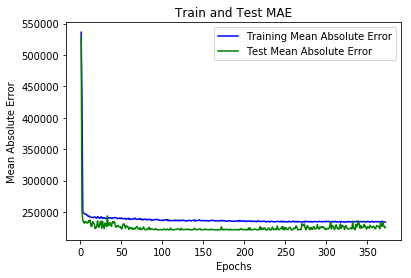

In [14]:
# plot MAE ve Epochs
epochs = range(1, len(loss) + 1)
plt.plot(epochs, train_mae, "b", label="Training Mean Absolute Error", color="blue")
plt.plot(epochs, test_mae, "b", label="Test Mean Absolute Error", color="green")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Train and Test MAE")
plt.show()

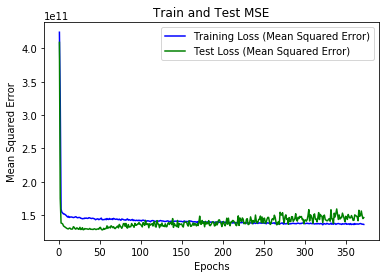

In [15]:
# plot mSE vs Epochs
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "b", label="Training Loss (Mean Squared Error)", color="blue")
plt.plot(epochs, val_loss, "b", label="Test Loss (Mean Squared Error)", color="green")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Train and Test MSE")
plt.show()